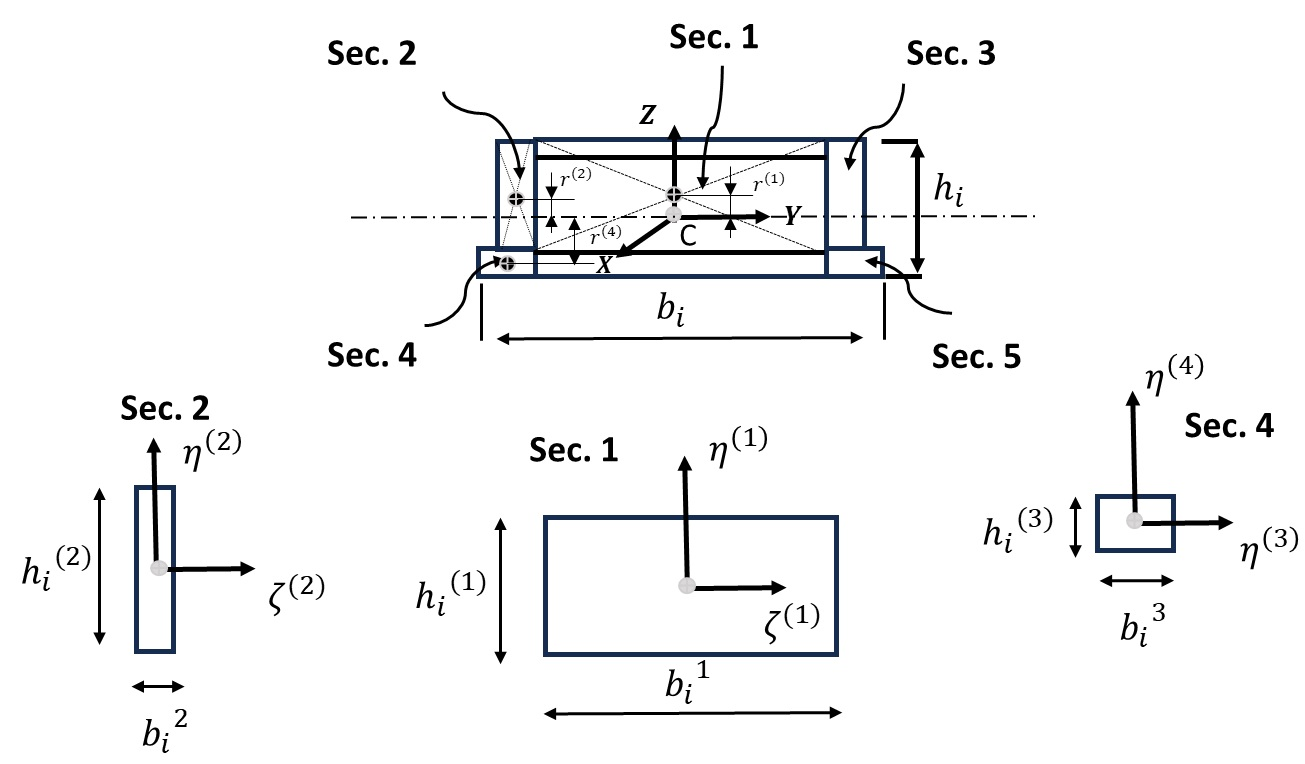

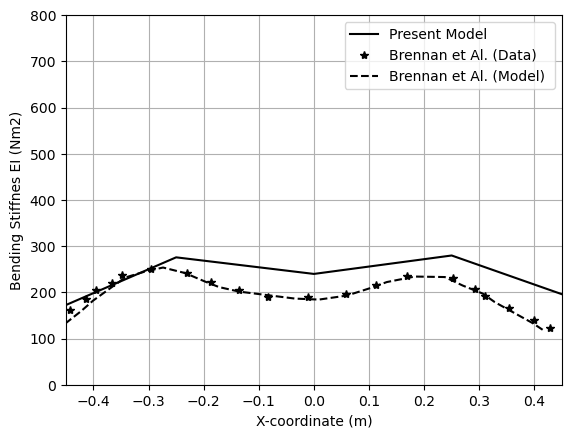

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

#####
Brennanx=np.array([-0.460975511,-0.44268283,-0.413414707,-0.395122026,-0.365853624,-0.347560943,-0.29634138,-0.230487895,
-0.186585293,-0.135366009,-0.084146445,
-0.01097572,0.058536524,0.113414568,0.168292611,0.252439057,0.2926829,0.310975581,0.354877904,0.398780507,0.428048629,

])
Brennany=np.array([132.6086306,160.8695686,185.8696036,204.3478326,220.6521816,236.9565306,250.0000181,242.3913136,222.8261031,205.4348141,190.2174051,190.2174051,196.7391696,215.2173986,235.8695906,
230.4348076,207.6087356,191.3043866,165.2174116,140.2174181,121.7390646,])

BrennanEx=np.array([-0.451359565,-0.422356709,-0.40060422,-0.371601364,-0.342598231,-0.306344453,
-0.273715997,-0.233836896,-0.197583118,-0.172205584,-0.135951806,-0.077945817,-0.034441117,
0.009063306,0.059818651,0.099697751,0.132326207,0.183081552,0.237462219,0.270090675,
0.306344453,0.328096664,0.378852009,0.396978898,0.418731109,
])
BrennanEy=np.array([132.2492426,159.3495952,182.1138053,207.0460867,231.9783267,244.9864645,253.6585426,241.7343991,223.3062486,
211.3821051,201.6260327,192.9539133,186.4498651,184.2818352,192.9539133,208.130081,222.222213,234.1463566,233.062321,214.6341292,197.289973,
178.8617812,145.2574631,133.3333195,115.9890807,])
####

# Global parameters
length    = 1.886         # Length of the Board in meters
Lr        = 1.645
YACP      =-0.5588
YFCP      = 0.5588
Ytail     =-0.7226
Ytip      = 0.7365
width     = 8.89e-4          # Width of the Board in meters
thickness = 2e-3             # Thickness of the Board in meters

num_elements = 10     # Number of elements
#num_elements= int(input("Enter the number of mesh elements: "))

# Array for the SKi K2 ChK 204 Dimenssions
YL=np.array([Ytail,YACP,-0.5,-0.25,0,0.25,0.5,YFCP,Ytip])     # kyepoints along the length
#YL=np.array([Ytail,YACP,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,YFCP,1,Ytip])     # kyepoints along the length
tLcore=1e-3*np.array([1.9,2.0,2.8,6.3,5.8,6.5,3.5,2.2,1.9])               # Total Thickness along X direction
b=1e-3*np.array([76.2,271.9,287.9,242.9,231.1,236.8,287.6,272.6,76.2])             # kyepoints along the width
kL=1e-3*np.array([55.0,0,.4,5.1,7.0,5.0,0.3,0.0,55.0])              # kyepoints along the z direction
tL=1e-3*np.array([4.8,4.8,5.7,9.2,8.7,9.4,6.4,5.1,4.8]) 

HPly=1e-4*np.array([0.205,0.255,5.550,5.550,0.255,0.205])   # Thickness of composite layers 
TotalThickness=np.sum(HPly)

# Material properties
#ABS
E_abs=1.7e9
G_abs=0.6e9
nu_abs=0.4
h_abs=0.81
h_left=3.89e-2
Roh_abs=1050
#steel
h_steel=2.03e-3
E_steel=200e9          # Young's modulus in Pa of steel
G_steel=80e6          # Shear modulus in Pa
nu_steel=0.3
Roh_steel=7900
# CFRP
E_Grfp = 40e9         # Young's modulus in Pa
E2_Grfp = 6.7e9        # Young's modulus in Pa (perpendicular to fibers)
nu_Grfp = 0.26         # Poisson's ratio
G_Grfp = 3.220e9         # Shear modulus in Pa
t_Gfrp = thickness     # Thickness of each layer in meters
h_Grfp = 8.64e-4
Roh_Grfp=2160
# Wood
E_wood = 14e9            # Young's modulus in Pa for wood
G_wood = 5.5e9 
nu_wood = 0.26           # Poisson's ratio for wood
h_wood = thickness      # Thickness of wood layer in meters
Roh_wood=500




HPlyh=np.array([-(h_wood/3+2*h_Grfp/3),-(h_wood/3+h_Grfp/3),-h_wood/3,0,h_wood/2,(h_wood/3+h_Grfp/3),(h_wood/3+2*h_Grfp/3)])
HPlyc=np.array([-(h_wood/2+2*h_Grfp/3),-(h_wood/2+h_Grfp/3),-h_wood/2,0,h_wood/2,(h_wood/2+h_Grfp/3),(h_wood/2+2*h_Grfp/3)])
HPlys=np.array([-(h_wood/3+2*h_Grfp/3),-(h_wood/3+h_Grfp/3),-h_wood/3,0,h_wood/2,(h_wood/3+h_Grfp/3),(h_wood/3+2*h_Grfp/3)])
HPly = np.empty((len(HPlyc),len(b)))
HPly[:, :9] = HPlyh.reshape(-1, 1)  # Fill first 4 columns with vector H
HPly[:, 9:29] = HPlyc.reshape(-1, 1)  # Fill columns 4 to 6 with vector g
HPly[:, 29:] = HPlys.reshape(-1, 1)


#HPly=np.array([.5,1.5,1,2.0,2.0,1.0,1.5,.5])*1e-3   # Thickness of composite layers 
TotalThickness=np.sum(HPly)
thickness =TotalThickness#5e-3#np.sum(np.abs((PtZcoou-PtZcoo)))
#print(thickness)


b4=3e-3 #
b2=thickness-b4

b1=b-2*b4
h1=TotalThickness     # The Laminate total thickness  
h2=b4                 # The Abs total thickness  
h4=b4                 # The Steel total thickness  
r1=tL                 # The distance btw the global centroid and the portion center
r4=h4                 # The distance btw the global centroid and the Steel portion center
r2=r4+h2/2            # The distance btw the global centroid and the Abs portion center
# PolplaWood
E_Pwood = 8.5e9        # Young's modulus in Pa for Binder
nu_Pwood= 0.3          # Poisson's ratio for Binder
G_Pwood = 0.610e9 


E_Materail=np.array([E_Grfp,E_Grfp,E_wood,E_wood,E_Grfp,E_Grfp,])
G_Materail=np.array([G_Grfp,G_Grfp,G_wood,G_wood,G_Grfp,G_Grfp])
nu_Materail=np.array([nu_Grfp,nu_Grfp,nu_wood,nu_wood,nu_Grfp,nu_Grfp])

length=np.max(np.abs(YL))*2 
el = float(length /num_elements)
#print(length)
#print(el)
#print(num_elements)
P=1

k=30               # The curvatuve of the neutral longitudinal (d2w/dx2)
    
angles=np.array([0,0,0,0,0,0])  # Angle of each CFRP layer in degrees

def calculate_ABD_matrices(E_mat, nu_mat,G_mat, h_mat,angles):
    
    # Initialize matrices A, B, and D
    A = np.zeros((3, 3))
    B = np.zeros((3, 3))
    D = np.zeros((3, 3))
    
      
    # Calculate A matrix elements for wood
    
    for i in np.arange(len(angles)):    

        if i==3 or i==4:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            
        else:
            Q_mat = np.array([[E_mat[i]/(1 - nu_mat[i]**2), nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [nu_mat[i]*E_mat[i]/(1 - nu_mat[i]**2), E_mat[i]/(1 - nu_mat[i]**2), 0],
                       [0, 0, G_mat[i]]]) 
            angle = np.radians(angles[i])
            cos = np.cos(angle)
            sin = np.sin(angle)
            cs = cos*sin
            cc = cos**2
            ss = sin**2
            T = np.zeros((3, 3))
            T = np.array([[cc,    ss,   cs   ],
                          [ss,    cc,  -cs   ],
                          [-2*cs, 2*cs, cc-ss]])
            Q_mat = np.matmul(np.matmul(np.transpose(T), Q_mat), T)
            
        
        A[0, 0] += (Q_mat[0, 0]* (h_mat[i+1]-h_mat[i])) 
        A[1, 1] += (Q_mat[1, 1]* (h_mat[i+1]-h_mat[i])) 
        A[0, 1] += (Q_mat[0, 1]* (h_mat[i+1]-h_mat[i])) 
        A[1, 0] += (Q_mat[1, 0]* (h_mat[i+1]-h_mat[i]))
        A[2, 2] += (Q_mat[2, 2]* (h_mat[i+1]-h_mat[i])) 
    
    # Calculate D matrix elements for wood
        D[0, 0] += Q_mat[0, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 1] += Q_mat[1, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[0, 1] += Q_mat[0, 1]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[1, 0] += Q_mat[1, 0]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
        D[2, 2] += Q_mat[2, 2]* (h_mat[i+1]**3-h_mat[i]**3) / 3 
    
    # Calculate B matrix elements (assuming symmetric laminate)
        B[0, 0] += 0.5*(Q_mat[0, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 1] += 0.5*(Q_mat[1, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[0, 1] += 0.5*(Q_mat[0, 1]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[1, 0] += 0.5*(Q_mat[1, 0]* (h_mat[i+1]**2-h_mat[i]**2)) 
        B[2, 2] += 0.5*(Q_mat[2, 2]* (h_mat[i+1]**2-h_mat[i]**2))
        #i+=1
        
        
 
    # Calculate the compliance matrix
    A_B = np.block([[A, B], [B, D]])
    inverse_Stifness_matrix = np.linalg.inv(A_B)
    
    return A, B, D, inverse_Stifness_matrix


# Function to calculate the bending stiffness of a composite laminate
def calculate_bending_stiffness(inSM1,E_steel,E_abs, b1,b2,b4, r1,r2,r4,t4,t2):
    
    beta1=inSM1[0:3,3:6]
    delta1=inSM1[3:6,3:6]
    alfa1=inSM1[0:3,0:3]
   
    #beta2=inSM2[0:3,3:6]
    #alfa2=inSM2[0:3,0:3]
    #delta2=inSM2[3:6,3:6]
    

    EI1=b1*(2*beta1[2,2]*r1-delta1[2,2]*r1**2-alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #EI2=(2/alfa2[2,2])*(b2**3/12+(r2**2*b2))
    EI2=2*E_abs*b2*t2*(t2**2/12+r2**2)
    EI3=2*E_steel*b4*t4*(t4**2/12+r4**2)

    #Centroide of the section
    G1=(b1*beta1[2,2]-r1*delta1[2,2]*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G4=(r2*b2/alfa2[2,2])
    G4=(r4*b4*E_abs*t4)
    G2=(r4*b4*E_steel*t4)

    G3=(-b1*alfa1[2,2])/(beta1[2,2]**2-delta1[2,2]*alfa1[2,2])
    #G5=(b2/alfa2[2,2])
    G5=(b2*E_abs*t2)
    G6=(b4*E_steel*t4)

    RC=(G1+2*G2+2*G4)/(G3+2*G5+2*G6)
    EI= EI1+EI2+EI3

    return EI,RC
h=2e-3
zjGrfp=np.abs((h_wood+h_Grfp/2)-0.00406858)
zjabs=np.abs(h_abs-0.00406858)
zjwood=np.abs(h_wood-0.00406858)
zjSteel=np.abs(h_steel-0.00406858)
#print(zjwood)
#print(h_steel)
xjSteel=np.abs(b/2-b4)
xjabs=np.abs(b/2-b4)
def mass_fun(Roh_wood,Roh_steel,Roh_abs,Roh_GRP, b,h_steel,h_wood,h_Grfp,h_abs,el,zjGrfp,zjabs,zjwood,zjSteel,xjSteel,xjabs):
    count=0
    Mass = np.zeros((len(b), 1))
    IPT=np.zeros((len(b), 1))
    
    for i in b:
        
        Mass[count]=(2*(h_steel*b[count]*Roh_steel)+h_wood*b[count]*Roh_wood+h_Grfp*b[count]*Roh_Grfp+2*(h_abs*b[count]*Roh_abs))*el  ## Mass
        
        TPhorGrfp =Roh_Grfp*((1/12)*b[count]**3*h_Grfp+(1/3)*b[count]*(3*zjGrfp**2*h_Grfp+1/4*h_Grfp**3))## Polar mass moment of inertia Grfp
        TPhorwood =Roh_wood*((1/12)*b[count]**3*h_wood+(1/3)*b[count]*(3*zjwood**2*h_wood+1/4*h_wood**3))## Polar mass moment of inertia Grfp
        IPhor=TPhorwood+TPhorGrfp
        
        TPhorSteel =Roh_steel*(xjSteel[count]**2*b[count]*h_steel+(zjSteel**2*h_steel*b[count])+(1/12*h_steel**3*b[count])+1/12*h_steel*b[count]**3) ## Polar mass moment of inertia steel
        TPhorabs =Roh_abs*(xjabs[count]**2*b[count]*h_abs+(zjabs**2*h_abs*b[count])+(1/12*h_abs**3*b[count])+1/12*h_abs*b[count]**3) ## Polar mass moment of inertia abs
        IPver=2*TPhorSteel+2*TPhorabs
        IPT[count]=IPhor+IPver
        count=count+1
        

    return Mass,IPT

Mass,IPT=mass_fun(Roh_wood,Roh_steel,Roh_abs,Roh_Grfp, b,h_steel,h_wood,h_Grfp,h_abs,el,zjGrfp,zjabs,zjwood,zjSteel,xjSteel,xjabs)

element_length = np.ones(num_elements) * (length / num_elements)


BendingStiff = np.zeros((len(b), 1))
Rcenter = np.zeros((len(b), 1))
j=0
for itr in b:
    #print(HPly[:, j])
        
    A1, B1, D1, inverseM1 = calculate_ABD_matrices(E_Materail, nu_Materail,G_Materail, HPly[:, j],angles)
    EI,RC = calculate_bending_stiffness(inverseM1,E_steel,E_abs, b1[j],b2,b4, r1[j],r2,r4,h4,h2) 
    
    BendingStiff[j]= EI 
    #print(BendingStiff)
    Rcenter[j]=RC
    j=j+1
    
    
plt.figure(2)
plt.plot(YL,BendingStiff,'k-',label='Present Model')
plt.plot(Brennanx,Brennany,'k*',label='Brennan et Al. (Data)')
plt.plot(BrennanEx,BrennanEy,'k--',label='Brennan et Al. (Model) ')
plt.legend()
plt.xlabel('X-coordinate (m)')
plt.ylabel('Bending Stiffnes EI (Nm2)')
plt.xlim(-0.45,0.45)
plt.ylim(0.0,800)
plt.grid()
plt.show()

#print(np.sum(Mass))
#print(IPT)
#print(BendingStiff)

#print(np.max(BendingStiff[10:-10]))



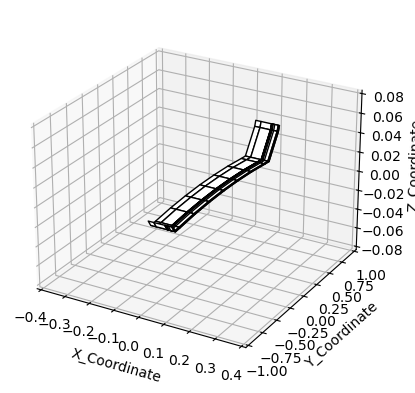

In [6]:

#3D representation 
# Global parameters
length    = 1.886         # Length of the Board in meters
Lr        =1.645
YACP      =-0.8285
YFCP      =0.8285
Ytail     =-0.867
Ytip      =1.019
width     = 8.89e-4          # Width of the Board in meters
thickness = 2e-3             # Thickness of the Board in meters

num_elements = 50     # Number of elements
#num_elements= int(input("Enter the number of mesh elements: "))

# Array for the SKi K2 ChK 204 Dimenssions
YL=np.array([Ytail,YACP,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,YFCP,1,Ytip])     # kyepoints along the length
tL=1e-3*np.array([66,67,73,113,158,172,151,114,71,65,65,65])
b=1e-4*np.array([832,867,834,721,659,649,690,782,925,974,220,0])             # kyepoints along the width
kL=1e-3*np.array([6,0,.6,2.9,4.2,4.70,4.2,2.90,.6,0,24.5,30.1])              # kyepoints along the z direction

# Plot the points
# Create meshgrid
YL_grid, tL_grid = np.meshgrid(b,YL)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(YL_grid, tL_grid, kL.reshape(b.shape[0], 1),facecolor='white',  edgecolor='black')

# Set labels
ax.set_xlabel('X_Coordinate')
ax.set_ylabel('Y_Coordinate')
ax.set_zlabel('Z_Coordinate')

# Set limits for x-direction
ax.set_xlim(-max(abs(YL)), max(abs(YL)))

# Set limits for y-direction
ax.set_ylim(-max(abs(kL)), max(abs(kL)))

# Set limits for z-direction
ax.set_zlim(-max(abs(b)), max(abs(b)))

ax.set_xlim(-0.4, 0.4)
ax.set_ylim(-1.0, 1.0)
ax.set_zlim(-0.08, 0.08)
ax.grid()
ax.view_init(elev=25, azim=-60)
#plt.axis('equal')
plt.show()




[ 489.97992854  480.32144422  470.65566525  460.98273976  451.30281595
  441.61604215  431.9225668   422.22253843  412.51610568  402.80341729
  393.08462207  383.35986896  373.62930697  363.8930852   354.15135285
  344.40425919  334.65195357  324.89458543  315.1323043   305.36525974
  295.59360144  285.81747912  276.03704259  266.25244171  256.46382641
  246.67134669  236.8751526   227.07539425  217.2722218   207.46578547
  197.65623553  187.84372228  178.0283961   168.21040738  158.38990656
  148.56704413  138.74197061  128.91483654  119.08579252  109.25498914
   99.42257706   89.58870694   79.75352946   69.91719533   60.07985527
   50.24166003   40.40276036   30.56330702   20.72345078   10.88334243
    1.04313274   -8.7970275   -18.63698751  -28.47659651  -38.31570372
  -48.15415839  -57.99180974  -67.82850703  -77.66409954  -87.49843656
  -97.33136738 -107.16274134 -116.99240779 -126.8202161  -136.64601569
 -146.46965598 -156.29098645 -166.10985661 -175.92611599 -185.73961419
 -195.

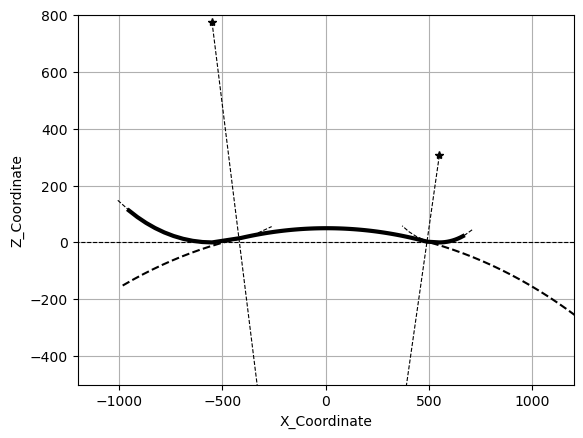

In [311]:
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt

Lc= 1100   # Contact Length
Ls= 175    # Shovel length
Lh= 175    # Hell Length
Hs= 55     # Tip Heigh
Hf= 50     # Free Bottom Comber
Hh= 20     # Heel Heigh

#Vertical Shovel and Heel Curve Modelling
rh=(Lh**2+Hh**2)/(2*Hh)   # radius of Heel
rs=(Ls**2+Hs**2)/(2*Hs)   # radius of Shovel

#Heel Curve
alfah = np.linspace(np.pi+(np.cos(Lh/rh))**-1, 3*np.pi/2,10)
Xh=-Lc/2+rh*np.cos(alfah)      
Zh=rh+rh*np.sin(alfah)
plt.plot(Xs,Zs)

#shavel Curve
alfas = np.linspace(3*np.pi/2, 2*np.pi-(np.cos(Ls/rs))**-1,10)
Xs=Lc/2+rs*np.cos(alfas)       
Zs=rs+rs*np.sin(alfas)
plt.plot(Xh,Zh)


# Camber curved Modeling
Xf= ((Lc**2-2*rs*Hf+2*rh*Hf)/(2*Lc))-Lc/2
rf=((Xf+Lc/2)**2-2*rh*Hf+Hf**2)/(2*Hf)
Zf0=Hf-rf


Xhc=(rh*Xf0+rf*Xh[-1])/(rh+rf)
Xsc=(rs*Xf0+rf*Xs[0])/(rs+rf)

gammah=(np.cos(Xhc/rh))**-1
gammas=(np.sin(Xsc/rs))**-1

gamma = np.linspace(gammas,np.pi-gammah, 250)
Xf=Xf0+rf*np.cos(gamma)   
Zf=Zf0+rf*np.sin(gamma)
plt.plot(Xf,Zf,color='k',linestyle='--')

# Define xlow and xhigh values
xlow = Xhc
xhigh = Xsc

# Create a mask to filter elements
mask = (Xf > xlow) & (Xf < xhigh)

# Extract elements that satisfy the conditions
extracted_valuesX = Xf[mask]
extracted_valueZ = Zf[mask]
print(extracted_valuesX)

Final_Shape_Xcoord = np.hstack((Xs[::-1], extracted_valuesX, Xh[::-1]))
Final_Shape_Zcoord  = np.hstack((Zs[::-1], extracted_valueZ, Zh[::-1]))

plt.plot(Final_Shape_Xcoord,Final_Shape_Zcoord,'k',linewidth='3')  # coordinate of the board shape

#plt.axis('equal')
plt.xlim(-1200,1200)
plt.ylim(-500,800)
plt.grid()
plt.xlabel('X_Coordinate')
plt.ylabel('Z_Coordinate')


### This Part is just for visualisation  purposes
alfaformh = np.linspace(1.3*np.pi, 2*np.pi-(np.cos(Ls/rs))**-1,10)
alfaforms = np.linspace(2*np.pi-(np.cos(Lh/rh))**-1,1.3*np.pi, 10)
Xhform=-Lc/2+rh*np.cos(alfaformh)      
Zhform=rh+rh*np.sin(alfaformh)
Xsform=Lc/2+rs*np.cos(alfaforms)       
Zsform=rs+rs*np.sin(alfaforms)
plt.plot(Xhform,Zhform,color='k',linestyle='--',linewidth='0.8')
plt.plot(Xsform,Zsform,color='k',linestyle='--',linewidth='0.8')
plt.plot(np.linspace(-1500,2000,10),0*np.linspace(-1500,2000,10),color='k',linestyle='--',linewidth='0.8')
plt.plot(Lc/2,rs,'k*')
plt.plot(-Lc/2,rh,'k*')
#plt.plot(Xf0,Zf0,'k*')
plt.plot([Lc/2,Xf0],[rs,Zf0],color='k',linestyle='--',linewidth='0.8')
plt.plot([-Lc/2,Xf0],[rh,Zf0],color='k',linestyle='--',linewidth='0.8')

In [55]:
print(YL)
print(displacements[1::2]) 


[-0.867  -0.8285 -0.75   -0.5    -0.25    0.      0.25    0.5     0.75
  0.8285  1.      1.019 ]
[ 3.74209805e-03  4.24897738e-05  3.55569176e-03  0.00000000e+00
  3.51087932e-03 -7.61422917e-04  3.31904824e-03 -1.47402461e-03
  2.99377334e-03 -2.12070273e-03  2.55090287e-03 -2.68368491e-03
  2.00855850e-03 -3.14452868e-03  1.38713532e-03 -3.48412153e-03
  7.09301848e-04  0.00000000e+00 -3.68268089e-03 -3.71975413e-03
 -6.43888817e-04 -3.91761580e-03]


In [89]:
print(global_Force[9:13:2])


[0. 0.]
